<a href="https://colab.research.google.com/github/OlayonChingon/ArgentinaPrograma4.0/blob/main/Smote_Tomek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
113/113 [==============================] - 2s 3ms/step - loss: 0.3461
Epoch 2/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2603
Epoch 3/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2474
Epoch 4/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2399
Epoch 5/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2352
Epoch 6/10
113/113 [==============================] - 0s 4ms/step - loss: 0.2287
Epoch 7/10
113/113 [==============================] - 0s 4ms/step - loss: 0.2231
Epoch 8/10
113/113 [==============================] - 0s 2ms/step - loss: 0.2180
Epoch 9/10
113/113 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 10/10
29/29 [==============================] - 0s 878us/step

Matriz de Confusión:
      No  Yes
No   770   37
Yes   69   29


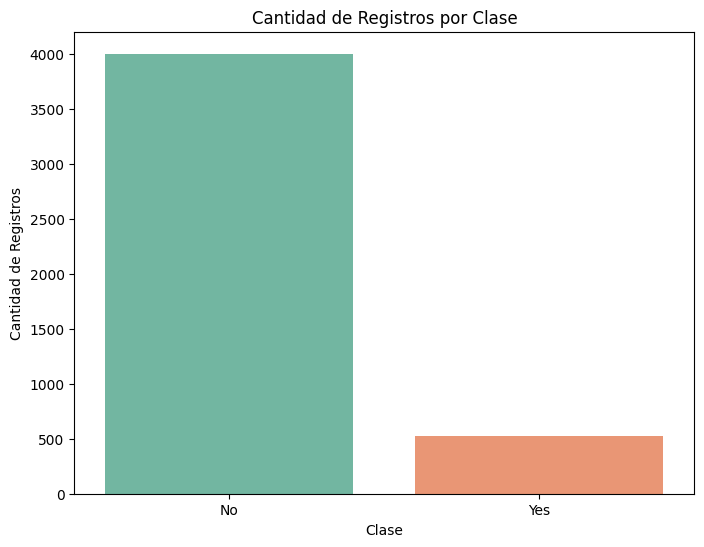

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

# Cargar el dataset
url = '/content/bank.csv'
data = pd.read_csv(url, sep=';')


# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)







# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)


# Crear un gráfico de barras para mostrar la cantidad de registros por clase
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette="Set2")
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase')
plt.xticks([0, 1], ['No', 'Yes'])  # Etiquetas personalizadas para las clases
plt.show()


In [ ]:

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)

f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print("F1-score:", f1)

F1-score: 0.3536585365853658


Epoch 1/10
193/193 [==============================] - 1s 1ms/step - loss: 0.3889
Epoch 2/10
193/193 [==============================] - 0s 1ms/step - loss: 0.3122
Epoch 3/10
193/193 [==============================] - 0s 1ms/step - loss: 0.2947
Epoch 4/10
193/193 [==============================] - 0s 1ms/step - loss: 0.2784
Epoch 5/10
193/193 [==============================] - 0s 1ms/step - loss: 0.2701
Epoch 6/10
193/193 [==============================] - 0s 1ms/step - loss: 0.2591
Epoch 7/10
193/193 [==============================] - 0s 1ms/step - loss: 0.2490
Epoch 8/10
193/193 [==============================] - 0s 1ms/step - loss: 0.2396
Epoch 9/10
193/193 [==============================] - 0s 1ms/step - loss: 0.2337
Epoch 10/10
49/49 [==============================] - 0s 1ms/step

Matriz de Confusión:
      No  Yes
No   660  102
Yes   77  703


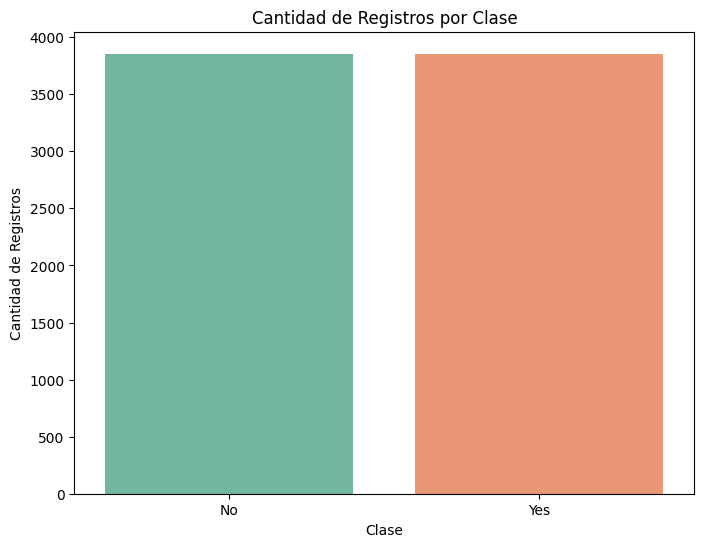

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from imblearn.combine import SMOTETomek  # Importar SMOTETomek

# Cargar el dataset
url = '/content/bank.csv'
data = pd.read_csv(url, sep=';')

# Procesar los datos
label_encoder = LabelEncoder()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Transformar etiquetas a numéricas
data['y'] = label_encoder.fit_transform(data['y'])

# Dividir en características y etiquetas
X = data.drop('y', axis=1)
y = data['y']

# Crear instancia de SMOTETomek
smote_tomek = SMOTETomek(random_state=42)

# Aplicar SMOTE-TOMEK al conjunto de datos
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Realizar predicciones en el conjunto de prueba
y_probs = model.predict(X_test)
y_pred = np.round(y_probs)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Nombres de clases
class_names = ['No', 'Yes']

# Estilizar la matriz de confusión con pandas
conf_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

# Mostrar la matriz de confusión estilizada
print("\nMatriz de Confusión:")
print(conf_df)

# Crear un gráfico de barras para mostrar la cantidad de registros por clase
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled, palette="Set2")
plt.xlabel('Clase')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por Clase')
plt.xticks([0, 1], ['No', 'Yes'])  # Etiquetas personalizadas para las clases
plt.show()


In [ ]:
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

precision = TP / (TP + FP)
sensitivity = TP / (TP + FN)

f1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print("F1-score:", f1)

F1-score: 0.8870662460567823
